### National Basketball Association

#### 2016 - 2017 season

In [19]:
import xgboost as xgb
import pandas as pd
import matplotlib.pyplot as plt
import os,re
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
nbaDf = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [9]:
nbaDf.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [12]:
features = [
#     'date',
#     'team1',
    'team1 encode',
#     'team1 ha',
    'team1 ha encode',
#     'team1 1st quarter',
#     'team1 2nd quarter',
#     'team1 3rd quarter',
#     'team1 4th quarter',
    'team1 final score',
    'team1 game result',
    'team1 game result encode',
    'team1 open spread',
#     'team1 open spread result',
#     'team1 open spread result encode',
    'team1 close spread',
#     'team1 close spread result',
#     'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
#     'team2',
    'team2 encode',
#     'team2 ha',
    'team2 ha encode',
#     'team2 1st quarter',
#     'team2 2nd quarter',
#     'team2 3rd quarter',
#     'team2 4th quarter',
#     'team2 final score',
#     'team2 game result',
    'team2 game result encode',
    'team2 open spread',
    'team2 open spread result',
    'team2 open spread result encode',
    'team2 close spread',
    'team2 close spread result',
    'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
#     'open total result',
#     'open total result encode',
    'close total']
#     'close total result',
#     'close total result encode',
#     'year'



In [16]:
nbaDf["date"].sample(155)

514      102
1025     318
684      125
801      210
676      124
        ... 
941      306
186     1119
729      201
1057     322
1132     331
Name: date, Length: 155, dtype: int64

In [17]:
nbaDf.set_index(["date"])

,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,...,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
date,,,,,,,,,,,,,,,,,,,,,
1025,New York Knicks,20,away,0,18,27,19,24,88,loss,...,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,...,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,...,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
1026,Miami Heat,16,away,0,23,27,30,28,108,win,...,-3.6,-9.6,26.1,202.0,over,1,200.0,over,1,2016
1026,Dallas Mavericks,7,away,0,21,31,33,30,121,loss,...,4.8,-5.6,23.3,207.5,over,1,204.5,over,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,Cleveland Cavaliers,6,away,0,30,22,20,19,91,loss,...,16.1,7.7,31.5,225.5,under,0,224.5,under,0,2016
604,Cleveland Cavaliers,6,away,0,34,30,24,25,113,loss,...,16.1,7.7,31.5,221.5,over,1,221.5,over,1,2016
607,Golden State Warriors,10,away,0,39,28,22,29,118,win,...,8.2,0.1,33.9,225.5,over,1,226.5,over,1,2016


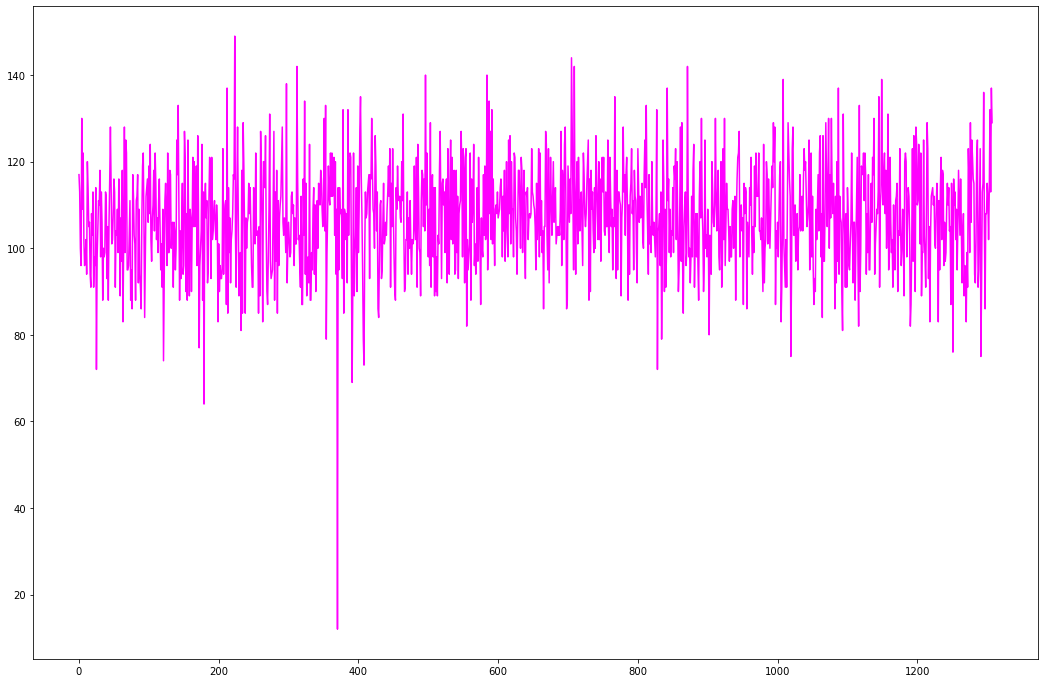

In [29]:

plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(nbaDf.index,nbaDf["team2 final score"],color="magenta")
plt.show()

In [26]:
nbaDfFinal = nbaDf[(nbaDf["team1 final score"] > 100) \
    & (nbaDf["team2 final score"] > 100)]

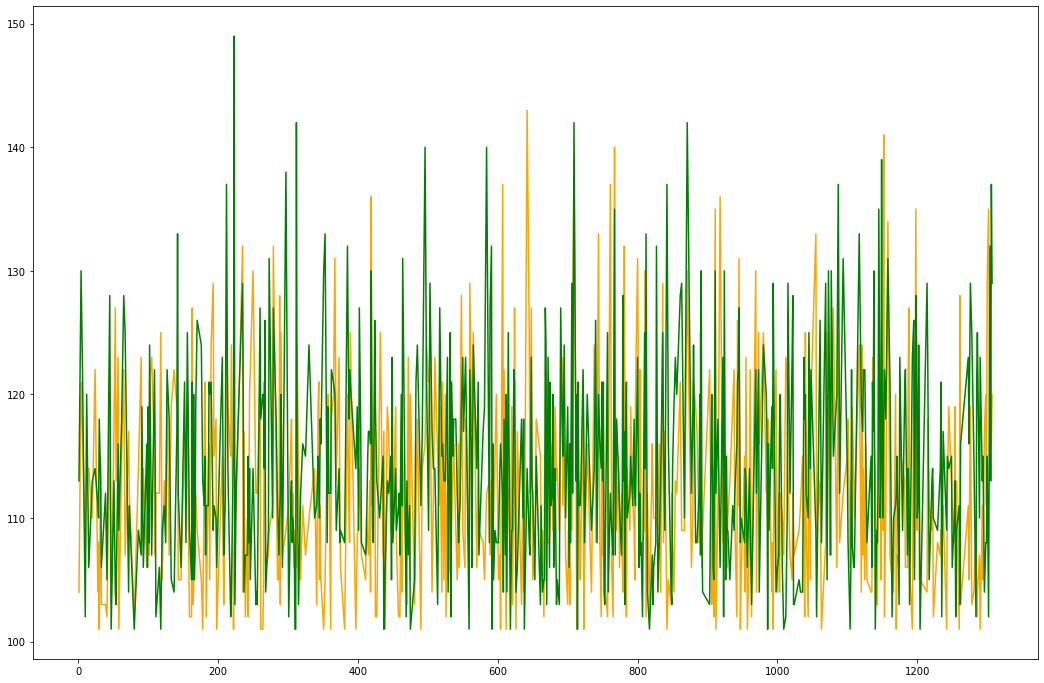

In [28]:
plt.figure(figsize=(18,12))
plt.plot(nbaDfFinal.index,nbaDfFinal["team1 final score"],color="orange")
plt.plot(nbaDfFinal.index,nbaDfFinal["team2 final score"],color="green")
plt.show()